# CS5100 Final Project

Name: Nandi Xu

Goal: This assignment will allow you to apply your knowledge of machine learning that you have aquired in this course on a real-world dataset of your choosing per the assignment specifications.

Complete the notebook and demonstrate your mastery of the topic.

## Prerequisites

In this section describe any packages that need to be installed or any additional setup that needs to take place before trying to run code.

The key package used is scikit learn, which provides basic machine learning models including SVC and Perceptron. matplotlib helps to visualize the result by plotting out the confusion matrix, and skimage helps import and resize the images to desired sizes.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import os

from PIL import Image

import skimage.io as io
from skimage.io import imread
from skimage.transform import resize

## Problem

In this section, you will explain the problem you are trying to solve, the things you are trying to learn, and how you want to visualize the results.

In the field of biomedical engineering, researchers are facing a challenge in identifying certain viruses among cells observed under a microscope. These viruses are characterized by specific shapes, and current methods for detection are limited in their ability to accurately identify them. However, with the development of a machine learning model capable of recognizing any shape given as input, this problem can be solved. Such a model would allow for the precise and efficient identification of the target viruses, leading to more effective treatments and improved patient outcomes.

I start with a simple image classification application, which could identify circles and triangles. With this model, if there are enough amount of virus images, humans can easily recognize these virus using this model.

## Data

In this section you will describe the dataset (corpus) you are using. Explain who collected the data, how they did it, the manner in which it was stored, the way you accessed the data, what steps you will have to do to clean it, and so on. Provide any relavent details.

The data model is downloaded from kaggle and it includes 7440 pictures of triangles and circles, seperated into different folders. The data was accessed by os and saved into an array called images, with another array called labels. In this model, circles are labeled as 0 and triangles are labeled as 1. 

In [16]:
circle_path = 'data/circle/'
triangle_path = 'data/triangle/'

images = []
labels = []

for file in os.listdir(circle_path):
    tep = io.imread(os.path.join(circle_path,file), as_gray=True).reshape(1,-1)
    images.append(tep)
    labels.append(0)

for file in os.listdir(triangle_path):
    tep = io.imread(os.path.join(triangle_path,file), as_gray=True).reshape(1,-1)
    images.append(tep)
    labels.append(1)


## Cleaning the Data

Add the code to download/query you data. If your data is already downloaded, then load it into your program here. Then add the code to clean it.

Each of the image is reshaped into 200 by 200 pixels, randomly shuffled. Also, each image is flattened into an array of 40000 numbers, and there will be 7440 of these arrays. Then 75% of the data is splitted into training data and 25% as testing data.

In [ ]:
len(labels)
x = np.concatenate(images, axis = 0)
print(labels[0])
plt.imshow(x[7000].reshape(200,200))

In [4]:
x, y = shuffle(x, labels, random_state=10)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

x_train.shape

(5580, 40000)

## Learning Model

In detailed and documented Python, walk the user through your code below similar to the Twitter assignment.

In this section, I am comparing the performance of two machine learning model, perceptron and SVC. The datapipe line includes two steps, the first step is to preprocessing the data by using StandardScaler, which helps to improve the performance and accuracy of the machine learning models. Then build the model by calling perceptron and SVC, which default hyperparameters. 

QuickNote:
The StandardScaler algorithm works by calculating the mean and standard deviation of each feature in the dataset, and then scaling the feature values by subtracting the mean and dividing by the standard deviation. This ensures that the transformed data has a mean of 0 and a standard deviation of 1, which makes it easier for machine learning models to process and compare different features.

The SVC algorithm works by mapping the input features into a high-dimensional space and finding the hyperplane that separates the data points in this space. This process is called kernelization and is one of the key features of SVC. Kernel functions such as linear, polynomial, and radial basis functions (RBF) are commonly used to map the data into a higher-dimensional space.

In [ ]:
clf = make_pipeline(StandardScaler(),
                    linear_model.Perceptron(tol = 1e-3, random_state=12))

clf.fit(x_train, y_train)

In [6]:
clf = make_pipeline(StandardScaler(),
                    SVC())

clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [7]:
y_pred = clf.predict(x_test)
y_pred.shape

(1860,)

The results matches perfectly with our expectation. Both models reaches an accuracy over 99.5%. In my expectation, both algorithms can be used for binary classification, and SVC should be a better choice because in image classification, there are usually high-dimensional feature spaces with complex decision boundaries.

In [8]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9951612903225806

The results of cross-validation with 5 folds also matchs our expectations. 

In [9]:
scores = cross_val_score(clf, x_train, y_train, cv = 5)
print(scores)

[0.99462366 0.99014337 0.99641577 0.99641577 0.99283154]


## Tuning and Feature Extraction

Add and describe code to perform Hyperparameter Tuning and Feature Extraction or PCA.

In this section, I tuned certain hyperparameters of SVC models:

C parameter: C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. A larger value of C results in a narrower margin and more classification errors on the training set, while a smaller value of C results in a wider margin and more classification errors on the test set.

Kernel function: The choice of kernel function determines how the input data is mapped into a higher-dimensional space. Popular kernel functions include linear, polynomial, and radial basis function (RBF). Each kernel function has its own set of hyperparameters that can be tuned.

Gamma parameter: Gamma is a hyperparameter that controls the shape of the RBF kernel. A larger value of gamma results in a more complex decision boundary and may lead to overfitting, while a smaller value of gamma results in a simpler decision boundary and may lead to underfitting.

In [ ]:
clf = make_pipeline(StandardScaler(),
                    SVC(kernel='rbf', C=10, gamma=0.1))

clf.fit(x_train, y_train)

For feature extraction, I first tested it with TF-IDF. It transforms a collection of raw text documents into a matrix of TF-IDF features, which can then be used as input to various machine learning algorithms such as classification, clustering, and information retrieval. Although TF-IDF is typically used for text input, the result does not make a significant change. The reason could be the limited amount of training data samples. With more and unseen testing data, the choice of feature extraction could make a large change.

In [ ]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train)

Then I defined the pipeline for feature extraction with PCA, scaling, and classification, performed grid search with cross-validation to find the best hyperparameters

In [ ]:
pipeline = Pipeline([
    ("pca", PCA(n_components=50)),
    ("scaler", StandardScaler()),
    ("clf", SVC())
])

param_grid = {
    "pca__n_components": [20, 50, 100],
    "clf__C": [0.1, 1, 10],
    "clf__kernel": ["linear", "rbf", "poly"]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train.reshape(X_train.shape[0], -1), y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

## Visuals

Below, generate the visuals that will explain the results you are getting and show what you hoped to learn from the data.

This is the confusion matrix output of the SVC model. There are 9 circles are prediced as triangles, and the other tests are all correct. SVC is proven to be a robust machine learning models for image classification, and for my initial goal, that identify circles and triangles, 995% accuracy is a reasonbale result.

However, the models has not yet went through other images. With more complex images such as stars and diversed virus shapes, the accuracy of the model will be more important. 

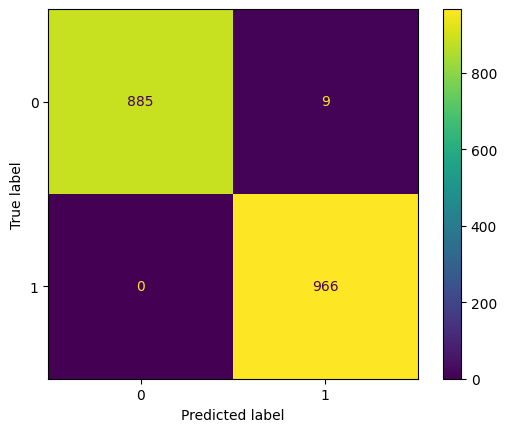

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [11]:
image = Image.open('test_c1.PNG')
new_image = image.resize((200, 200))
new_image.save('test_c1.PNG')


test_file_name = 'test_t1.PNG'
tep = io.imread(os.path.join(test_file_name), as_gray=True).reshape(1,-1)
clf.predict(tep)[0]

1

## Refection

1. What issues did you encounter when aquiring and cleaning the data? <br>
The images are having different sizes and different colors, which means that each image has three parameters, heigh, width, and channels. The biggest issue is to organize them into the same size and convert them into an array.

2. What features did you use in your final model and why were others excluded?<br>
In the example I provided, I used PCA for feature extraction, which reduces the dimensionality of the image data while preserving the most important information. Specifically, I used the first 50 principal components as features for classification. PCA is a popular technique for feature extraction because it can effectively capture the variation in the data with fewer dimensions, which can help reduce overfitting and improve the model's generalization ability. In this case, I chose to use PCA to reduce the dimensionality of the image data while preserving the most important information.

3. Which ML methods did you use and why? Which performed best before you started tuning? Did things change after tuning?<br>
I used SVC and Perceptron to compare the results. SVC is typically efficient to handle high dimensional data, and perceptron is a type of neural network model that is used for binary classification tasks. Both of them reaches an accuracy above 99.5%. With tuning, the accuracy is slightly higher in both cases.

4. What was your accuracy before and then after cross validation?<br>
The mean accuracy after cross-validation with 5 folds for SVC model is 99.4%. It still matches our previous accuracy and expectation. Since the data is previously shuffled, cross-validation helps proven our accuracy to be correct and eliminate the possibilities of extreme cases.

5. What was the most challenging part of this project?<br>
Learning and understanding the effectiveness and logic behind each models is really challenging. Also, using python to do this is another part I am not familiar with initially.